<h2>Redes Neurais de apenas um único Perceptron 
<br>
Aluno: Vitor Martins Soares<br>



O perceptron é um algoritmo muito simples que busca separar linearmente diferentes valores de entradas e seus resultados. Neste documento iremos mostrar a criação de funções que são utilizadas pelo perceptron e a aplicação real para classificação de uma porta lógica OR e uma XOR. Já adiantando, a porta OR ela é linearmente separável, o que trás um resultado agradável, já a porta XOR não é linearmente seperável, o que faz com que o resultado não consiga estabilizar, sempre ocorrendo erros.

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import math
import random

Este é a função de calculo de ajustes dos pesos no perceptron, apartir do erro, a taxa de aprendizado, o peso a ser recalculado e o valor de sua entrada, utiliza a forma: peso futuro é igual o peso antes do ajuste mais a multiplicação da taxa pelo erro e pelo valor de entrada do perceptron.

In [2]:
def ajustes(erro,taxa,pesos,lista):
  for x in range(0,len(lista)):
    pesos[x] = pesos[x]+(taxa*erro*lista[x])
  return pesos

Esta é a função de somatorio, o resultado desta função será enviado para a função de ativação, ela soma todas as multiplicações dos pesos pelos suas respectivas entradas, em alguns perceptron se usa o teta, ou o byas, o byas adiciona uma entrada que sempre é 1 e o peso desta entrada, o teta é um valor escolhido para subtrair da multiplicação do peso e a entrada, antes de somar todas as multiplicações de peso e entrada.

In [3]:
def somatorio(lista,pesos):
  soma=0
  for x in range(0,len(lista)):
    soma+=lista[x]*pesos[x]
  return soma

Esta é a função de ativação escolhida, é a função degrau, com todos os valores do somatorio sendo menores e iguais a 0.5 são 0, e todos maiores que 0.5 são 1.

In [4]:
def func_degrau(a1):
  if(a1>0):
    return 1
  return 0

Aqui é criado o perceptron, onde existe 10 epocas para o treinamento e cada epoca passa por 4 amostras de valores 0 0, 0 1, 1 0 e 1 1, como estamos fazendo perceptron para treinamento de valores de OU, os casos 0 1, 1 0 e 1 1 deveriam retornar valores 1. No gráfico abaixo mostra os valores de erros, que depois da segunda epóca ele já estabiliza e acha os pesos corretos para esse perceptron, lembrando que a cada 4 treinamentos contabiliza 1 epoca. É possível perceber que foi um treinamento rápido por causa dos pesos iniciais iguais a 0 e a taxa de aprendizado 0.3.

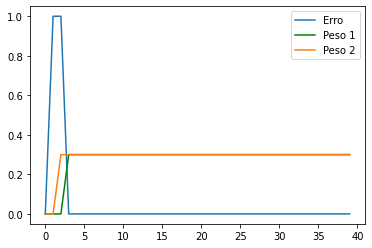

In [5]:
lista = [[0,0,0],[0,1,1],[1,0,1],[1,1,1]]
pesos = [0,0]
taxa = 0.3
erros = list()
tempo = list()
cont=0
tempo_pesos1 = list()
tempo_pesos2 = list()
for x in range(0,10):
  for y in lista:
    tempo_pesos1.append(pesos[0])
    tempo_pesos2.append(pesos[1])
    valor_previsto = func_degrau(somatorio((y[0],y[1]),pesos))
    erro = y[2]-valor_previsto
    erros.append(erro)
    tempo.append(cont)
    cont+=1
    pesos=ajustes(erro,taxa,pesos,(y[0],y[1]))
plt.plot(tempo,erros,label="Erro")
plt.plot(tempo,tempo_pesos1,'g-',label="Peso 1")
plt.plot(tempo,tempo_pesos2,label="Peso 2")
plt.legend()
plt.show()

Neste caso, para fins de teste, foi colocado uma taxa de aprendizagem menor com os mesmos pesos e foi possível ver que os erros e os ajustes dos pesos aconteceram até a época 5, no treinamento 20 se pensarmos q cada epoca tem 4 amostras, após isso os pesos ajustados foram suficientes e não ocorreu mais erro, então a rede neural de apenas um único perceptron chegou no resultado, apenas demorou mais.


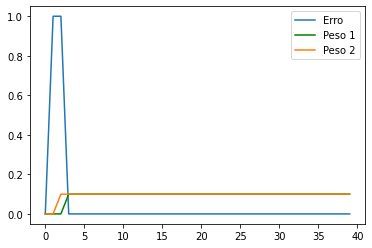

In [6]:
lista = [[0,0,0],[0,1,1],[1,0,1],[1,1,1]]
pesos = [0,0]
taxa = 0.1
erros = list()
tempo = list()
cont=0
tempo_pesos1 = list()
tempo_pesos2 = list()
for x in range(0,10):
  for y in lista:
    tempo_pesos1.append(pesos[0])
    tempo_pesos2.append(pesos[1])
    valor_previsto = func_degrau(somatorio((y[0],y[1]),pesos))
    erro = y[2]-valor_previsto
    erros.append(erro)
    tempo.append(cont)
    cont+=1
    pesos=ajustes(erro,taxa,pesos,(y[0],y[1]))
plt.plot(tempo,erros,label="Erro")
plt.plot(tempo,tempo_pesos1,'g-',label="Peso 1")
plt.plot(tempo,tempo_pesos2,label="Peso 2")
plt.legend()
plt.show()

Agora neste caso, atribuindo 1 para todos os pesos, é possível ver que os pesos não sofrem ajustes e não ocorre nenhum erro, isso acontece porque os pesos iniciais atribuidos já são suficientes para dar o resultado que é esperado, então a rede já é criada "treinada".

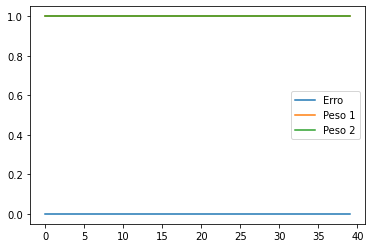

In [7]:
lista = [[0,0,0],[0,1,1],[1,0,1],[1,1,1]]
pesos = [1,1]
taxa = 0.3
erros = list()
tempo = list()
cont=0

tempo_pesos1 = list()
tempo_pesos2 = list()
for x in range(0,10):
  for y in lista:
    tempo_pesos1.append(pesos[0])
    tempo_pesos2.append(pesos[1])
    valor_previsto = func_degrau(somatorio((y[0],y[1]),pesos))
    erro = y[2]-valor_previsto
    erros.append(erro)
    tempo.append(cont)
    cont+=1
    pesos=ajustes(erro,taxa,pesos,(y[0],y[1]))
plt.plot(tempo,erros,label="Erro")
plt.plot(tempo,tempo_pesos1,label="Peso 1")
plt.plot(tempo,tempo_pesos2,label="Peso 2")
plt.legend()
plt.show()

Agora, pensando no XOR, que seria o OU exclusivo onde valores 0 0 e 1 1 teriam que retornar valor 0 e valores 1 0 ou 0 1 deveriam retornar valor 1, é impossível achar pesos para apenas um perceptron aprender a classificar um XOR, pois uma porta XOR não é linearmente separável, o que traz a necessidade da criação de uma Rede Neural de Multiplas Camadas de Perceptron, ou na sigla em inglês, MLP. O gráfico abaixo mostra que com apenas 1 perceptron, o erro e os pesos apenas variam mas nunca estabilizam independente de quantas épocas ou amostras se faz.

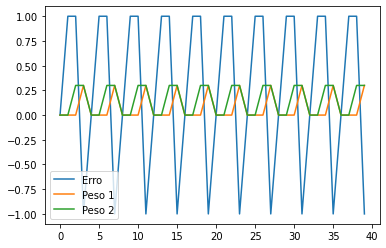

In [8]:
lista = [[0,0,0],[0,1,1],[1,0,1],[1,1,0]]
pesos = [0,0]
taxa = 0.3
erros = list()
tempo = list()
cont=0
tempo_pesos1 = list()
tempo_pesos2 = list()
for x in range(0,10):
  for y in lista:
    tempo_pesos1.append(pesos[0])
    tempo_pesos2.append(pesos[1])
    valor_previsto = func_degrau(somatorio((y[0],y[1]),pesos))
    erro = y[2]-valor_previsto
    erros.append(erro)
    tempo.append(cont)
    cont+=1
    pesos=ajustes(erro,taxa,pesos,(y[0],y[1]))
plt.plot(tempo,erros,label="Erro")
plt.plot(tempo,tempo_pesos1,label="Peso 1")
plt.plot(tempo,tempo_pesos2,label="Peso 2")
plt.legend()
plt.show()